<a href="https://colab.research.google.com/github/urkderk/Volleyball-Project/blob/main/Prediction%20Model%20-%20Block.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_theme(style="whitegrid")

# special matplotlib argument for improved plots
from matplotlib import rcParams
import sys
import os


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
vball_df = pd.read_csv('clean_data.csv', encoding='unicode_escape')
vball_df = vball_df[vball_df.columns.difference(['index'])]
vball_df = vball_df[vball_df.columns.difference(['date_of_birth'])]
vball_df = vball_df[vball_df.columns.difference(['name'])]
vball_df.head(50)

,block,country,height,position_number,spike,weight
0,305,23,193,3,320,80
1,284,23,182,1,295,71
2,296,23,190,2,306,72
3,278,23,176,6,288,62
4,275,23,181,1,290,70
5,297,23,186,3,306,67
6,295,23,188,2,305,72
7,297,23,187,3,305,78
8,298,23,187,2,305,80
9,300,23,190,4,315,67


In [3]:
vball_df.drop(index=68,inplace=True)
vball_df.drop(index=212,inplace=True)
vball_df.drop(index=356,inplace=True)

In [4]:
vball_df.describe()


,block,country,height,position_number,spike,weight
count,429.000000,429.000000,429.000000,429.000000,429.00000,429.000000
mean,277.433566,19.706294,181.000000,2.748252,288.79021,68.727273
std,24.027017,8.498350,8.239692,1.413231,25.57722,7.367695
min,178.000000,5.000000,153.000000,1.000000,178.00000,52.000000
25%,274.000000,10.000000,175.000000,2.000000,285.00000,63.000000
50%,283.000000,23.000000,182.000000,2.000000,294.00000,69.000000
75%,292.000000,29.000000,187.000000,3.000000,304.00000,73.000000
max,310.000000,31.000000,199.000000,6.000000,336.00000,87.000000


In [5]:
#make position number and country categorical variables
vball_df
vball_df['position_number']
pd.Categorical(vball_df['position_number'])
pd.Categorical(vball_df['country'])
print(vball_df['position_number'])
print(vball_df['country'])

0      3
1      1
2      2
3      6
4      1
      ..
427    2
428    3
429    1
430    1
431    3
Name: position_number, Length: 429, dtype: int64
0      23
1      23
2      23
3      23
4      23
       ..
427    26
428    26
429    26
430    26
431    26
Name: country, Length: 429, dtype: int64


In [6]:
setter = vball_df[vball_df["position_number"] ==1]
outside = vball_df[vball_df["position_number"] ==2]
middle = vball_df[vball_df["position_number"] ==3]
opposite = vball_df[vball_df["position_number"] ==4]
libero = vball_df[vball_df["position_number"] ==6]

In [7]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
a = ols('block ~ height',setter).fit()
print(a.summary())

                            OLS Regression Results                            
Dep. Variable:                  block   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     44.09
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           4.82e-09
Time:                        01:20:39   Log-Likelihood:                -315.64
No. Observations:                  75   AIC:                             635.3
Df Residuals:                      73   BIC:                             639.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.8755     49.484     -1.089      0.2

Text(0.5, 1.0, 'Block Height vs Predicted Block Height: $Y_i$ vs $\\hat{Y}_i$')

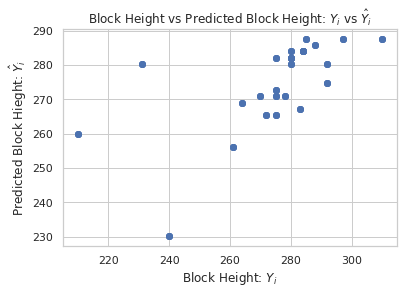

In [32]:
plt.scatter(setter['block'], a.fittedvalues)
plt.xlabel("Block Height: $Y_i$")
plt.ylabel("Predicted Block Hieght: $\hat{Y}_i$")
plt.title("Block Height vs Predicted Block Height: $Y_i$ vs $\hat{Y}_i$")

In [33]:
from sklearn.linear_model import LinearRegression
A = setter.drop('block', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

In [34]:
lm.fit(A, setter.block)

LinearRegression()

In [35]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -47.575852251322544


In [38]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 5


In [37]:
zip(A.columns, lm.coef_)

In [39]:
# The coefficients
pd.DataFrame(zip(A.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,country,0.073062
1,height,1.259159
2,position_number,0.000000
3,spike,0.555164
4,weight,-0.897015


In [40]:
# first five predicted prices
lm.predict(A)[0:5]

array([283.35681381, 280.21885039, 260.50617538, 289.62371773,
       273.81795545])

Text(0.5, 1.0, 'Setter Block Height vs Predicted Setter Block Height: $Y_i$ vs $\\hat{Y}_i$')

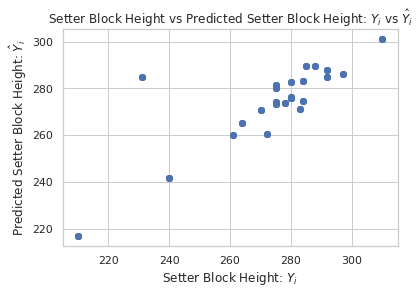

In [41]:
plt.scatter(setter.block, lm.predict(A))
plt.xlabel("Setter Block Height: $Y_i$")
plt.ylabel("Predicted Setter Block Height: $\hat{Y}_i$")
plt.title("Setter Block Height vs Predicted Setter Block Height: $Y_i$ vs $\hat{Y}_i$")

In [42]:
## residual sum of squares
print(np.sum((setter.block - lm.predict(A)) ** 2))

11214.23843211813


In [43]:
##mean squared error
mseFull = np.mean((setter.block- lm.predict(A)) ** 2)
print(mseFull)

149.5231790949084


FOR OUTSIDE HITTER

In [44]:
b = ols('block ~ height',outside).fit()
print(b.summary())

                            OLS Regression Results                            
Dep. Variable:                  block   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     84.93
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           3.78e-16
Time:                        01:30:49   Log-Likelihood:                -661.45
No. Observations:                 144   AIC:                             1327.
Df Residuals:                     142   BIC:                             1333.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -152.2883     46.306     -3.289      0.0

Text(0.5, 1.0, 'Outside Height vs Predicted Outside Block Height: $Y_i$ vs $\\hat{Y}_i$')

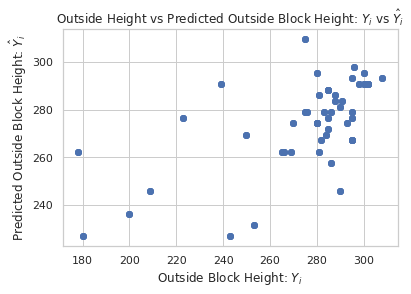

In [45]:
plt.scatter(outside['block'], b.fittedvalues)
plt.xlabel("Outside Block Height: $Y_i$")
plt.ylabel("Predicted Outside Block Height: $\hat{Y}_i$")
plt.title("Outside Height vs Predicted Outside Block Height: $Y_i$ vs $\hat{Y}_i$")

Estimated intercept coefficient: 30.05269459294084
Number of coefficients: 5


Text(0.5, 1.0, 'Outside Height vs Predicted Outside Block Height: $Y_i$ vs $\\hat{Y}_i$')

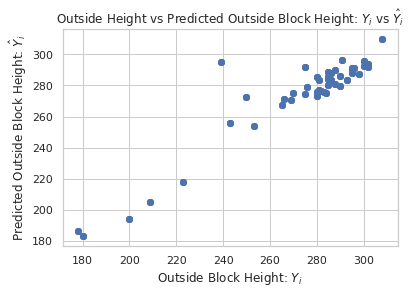

In [46]:
B = outside.drop('block', axis = 1)
lm.fit(B, outside.block)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
zip(B.columns, lm.coef_)
pd.DataFrame(zip(B.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
lm.predict(B)[0:5]
plt.scatter(outside['block'], lm.predict(B))
plt.xlabel("Outside Block Height: $Y_i$")
plt.ylabel("Predicted Outside Block Height: $\hat{Y}_i$")
plt.title("Outside Height vs Predicted Outside Block Height: $Y_i$ vs $\hat{Y}_i$")

In [47]:
## residual sum of squares
print(np.sum((outside.block - lm.predict(B)) ** 2))
##mean squared error
mseFull = np.mean((outside.block - lm.predict(B)) ** 2)
print(mseFull)

16357.576418252713
113.59428068231048


FOR OPPOSITE HITTER

In [48]:
c = ols('block ~ height',opposite).fit()
print(c.summary())

                            OLS Regression Results                            
Dep. Variable:                  block   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     13.48
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           0.000526
Time:                        01:30:57   Log-Likelihood:                -250.87
No. Observations:                  60   AIC:                             505.7
Df Residuals:                      58   BIC:                             509.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7257     59.959      1.079      0.2

Text(0.5, 1.0, 'Opposite Height vs Predicted Opposite Block Height: $Y_i$ vs $\\hat{Y}_i$')

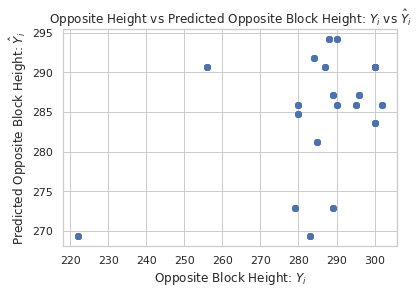

In [49]:
plt.scatter(opposite['block'], c.fittedvalues)
plt.xlabel("Opposite Block Height: $Y_i$")
plt.ylabel("Predicted Opposite Block Height: $\hat{Y}_i$")
plt.title("Opposite Height vs Predicted Opposite Block Height: $Y_i$ vs $\hat{Y}_i$")

Estimated intercept coefficient: 171.5071245347094
Number of coefficients: 5


Text(0.5, 1.0, 'Opposite Height vs Predicted Opposite Block Height: $Y_i$ vs $\\hat{Y}_i$')

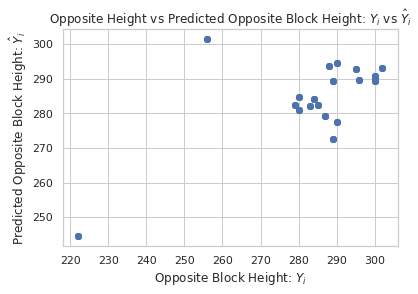

In [50]:
C = opposite.drop('block', axis = 1)
lm.fit(C, opposite.block)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
zip(C.columns, lm.coef_)
pd.DataFrame(zip(C.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
lm.predict(C)[0:5]
plt.scatter(opposite['block'], lm.predict(C))
plt.xlabel("Opposite Block Height: $Y_i$")
plt.ylabel("Predicted Opposite Block Height: $\hat{Y}_i$")
plt.title("Opposite Height vs Predicted Opposite Block Height: $Y_i$ vs $\hat{Y}_i$")

In [51]:
## residual sum of squares
print(np.sum((opposite.block - lm.predict(C)) ** 2))
##mean squared error
mseFull = np.mean((opposite.block - lm.predict(C)) ** 2)
print(mseFull)

10719.281367791125
178.65468946318543


In [27]:
FOR MIDDLE BLOCKER

SyntaxError: ignored

In [52]:
d = ols('block ~ height',middle).fit()
print(d.summary())

                            OLS Regression Results                            
Dep. Variable:                  block   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.166
Date:                Fri, 10 Jun 2022   Prob (F-statistic):              0.144
Time:                        01:31:04   Log-Likelihood:                -437.28
No. Observations:                 108   AIC:                             878.6
Df Residuals:                     106   BIC:                             883.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    356.5342     48.394      7.367      0.0

Text(0.5, 1.0, 'Middle Height vs Predicted Middle Block Height: $Y_i$ vs $\\hat{Y}_i$')

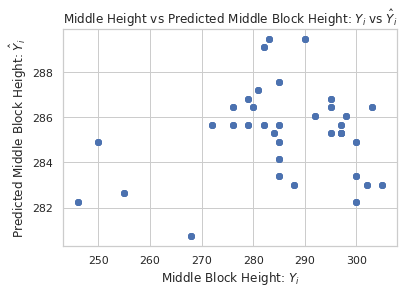

In [53]:
plt.scatter(middle['block'], d.fittedvalues)
plt.xlabel("Middle Block Height: $Y_i$")
plt.ylabel("Predicted Middle Block Height: $\hat{Y}_i$")
plt.title("Middle Height vs Predicted Middle Block Height: $Y_i$ vs $\hat{Y}_i$")

Estimated intercept coefficient: 196.00553752069789
Number of coefficients: 5


Text(0.5, 1.0, 'Middle Height vs Predicted Middle Block Height: $Y_i$ vs $\\hat{Y}_i$')

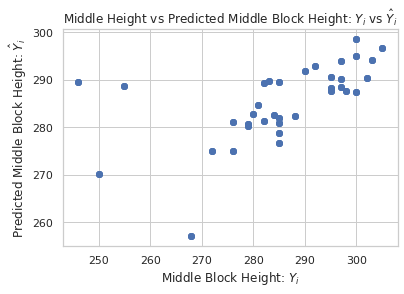

In [54]:
D = middle.drop('block', axis = 1)
lm.fit(D, middle.block)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
zip(D.columns, lm.coef_)
pd.DataFrame(zip(D.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
lm.predict(D)[0:5]
plt.scatter(middle['block'], lm.predict(D))
plt.xlabel("Middle Block Height: $Y_i$")
plt.ylabel("Predicted Middle Block Height: $\hat{Y}_i$")
plt.title("Middle Height vs Predicted Middle Block Height: $Y_i$ vs $\hat{Y}_i$")

In [55]:
## residual sum of squares
print(np.sum((middle.block - lm.predict(D)) ** 2))
##mean squared error
mseFull = np.mean((middle.block - lm.predict(D)) ** 2)
print(mseFull)

14211.16175492063
131.5848310640799


FOR LIBEROS

In [56]:
e = ols('block ~ height',libero).fit()
print(e.summary())

                            OLS Regression Results                            
Dep. Variable:                  block   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     11.27
Date:                Fri, 10 Jun 2022   Prob (F-statistic):            0.00174
Time:                        01:31:15   Log-Likelihood:                -187.29
No. Observations:                  42   AIC:                             378.6
Df Residuals:                      40   BIC:                             382.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -86.5682    104.368     -0.829      0.4

Text(0.5, 1.0, 'Libero Height vs Predicted Libero Block Height: $Y_i$ vs $\\hat{Y}_i$')

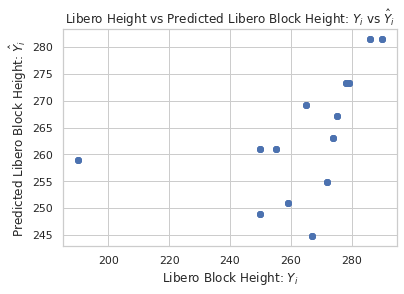

In [57]:
plt.scatter(libero['block'], e.fittedvalues)
plt.xlabel("Libero Block Height: $Y_i$")
plt.ylabel("Predicted Libero Block Height: $\hat{Y}_i$")
plt.title("Libero Height vs Predicted Libero Block Height: $Y_i$ vs $\hat{Y}_i$")

Estimated intercept coefficient: 55.44917317669669
Number of coefficients: 5


Text(0.5, 1.0, 'Libero Height vs Predicted Libero Block Height: $Y_i$ vs $\\hat{Y}_i$')

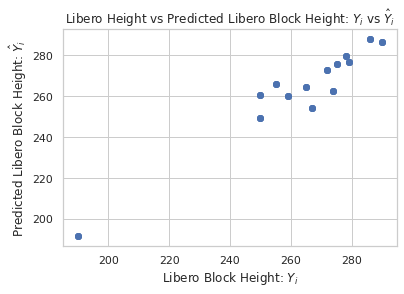

In [58]:
E = libero.drop('block', axis = 1)
lm.fit(E, libero.block)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
zip(E.columns, lm.coef_)
pd.DataFrame(zip(E.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
lm.predict(E)[0:5]
plt.scatter(libero['block'], lm.predict(E))
plt.xlabel("Libero Block Height: $Y_i$")
plt.ylabel("Predicted Libero Block Height: $\hat{Y}_i$")
plt.title("Libero Height vs Predicted Libero Block Height: $Y_i$ vs $\hat{Y}_i$")

In [59]:
## residual sum of squares
print(np.sum((libero.block - lm.predict(E)) ** 2))
##mean squared error
mseFull = np.mean((libero.block - lm.predict(E)) ** 2)
print(mseFull)

1654.1906482701138
39.385491625478906
